In [1]:
import torch
from pipeline_flux import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power

/home/wg25r/miniconda/envs/mochi/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  8.96it/s]
Expected types for transformer: (<class 'transformer_flux.FluxTransformer2DModel'>,), got <class 'diffusers.models.transformers.transformer_flux.FluxTransformer2DModel'>.


In [2]:
from flux_processor import FluxAttnProcessor2_0
for block in pipe.transformer.transformer_blocks:
    block.attn.processor = FluxAttnProcessor2_0()

In [9]:
pipe.tokenizer("vegetation")

{'input_ids': [49406, 33947, 49407], 'attention_mask': [1, 1, 1]}

100%|██████████| 50/50 [00:48<00:00,  1.03it/s]


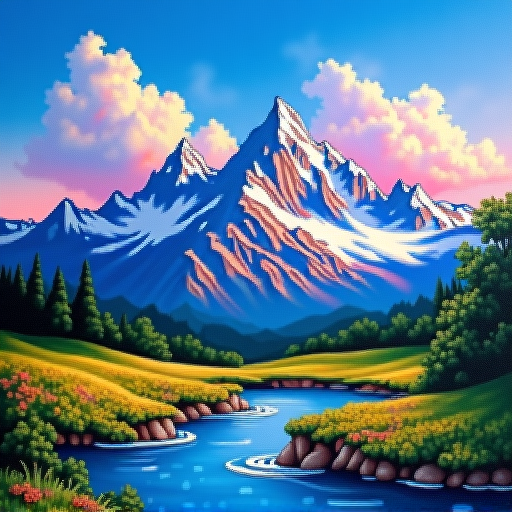

In [ ]:
import time
image = pipe(
    prompt="a beautiful landscape with mountains, in the style of Bob Ross",
    width=512,
    height=512,
    negative_prompt="vegetation",
    num_inference_steps=50,
    true_cfg_scale=4,
    generator=torch.manual_seed(1989),
).images[0]
image 

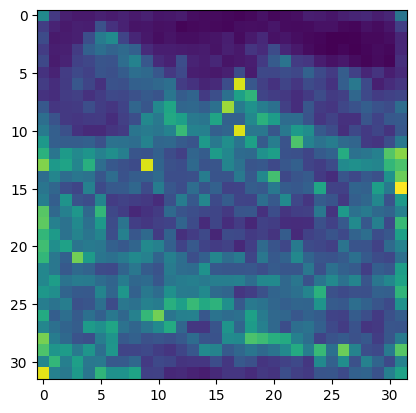

In [ ]:
import numpy as np
import pylab
nmap = np.array([i.cpu().float() for i in pipe.negative_attn_maps]).mean(0).reshape(32, 32)
pylab.imshow(nmap)

In [2]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16).to("cuda:1")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
prompt = "a women getting tickle tortured for her armpit under deep swimming pool water trying holding her breath but bubble is getting out because she cannot hold it anymore trying to get out and escape but she cannot get out, she is struggling, face showing very painful emotion because of the tickle and breath hold. chocking"
image = pipe(
    prompt,
    negative_prompt="easy, enjoyable, fun, relaxing, peaceful, calm, tranquil, serene, soothing, gentle, lighthearted, playful, humorous, comical, silly, amusing, entertaining, enjoyable, pleasant, delightful",
    height=1024,
    width=1024,
    guidance_scale=5, 
    true_cfg_scale=2,
    max_sequence_length=512,
).images[0]
image.save("flux-dev.png")


  0%|          | 0/28 [00:00<?, ?it/s]

In [1]:
import torch
from diffusers import StableDiffusion3Pipeline
from attention_map_diffusers import (
    attn_maps,
    init_pipeline,
    save_attention_maps
)

pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3.5-large",
    torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda:1")

##### 1. Replace modules and Register hook #####
# pipe = init_pipeline(pipe)
################################################

# recommend not using batch operations for sd3, as cpu memory could be exceeded.
prompts = [
    # "A photo of a puppy wearing a hat.",
    "a women getting tickle tortured for her armpit under deep swimming pool water trying holding her breath but bubble is getting out because she cannot hold it anymore trying to get out and escape but she cannot get out, she is struggling, face showing very painful emotion because of the tickle and breath hold chocking"
]

images = pipe( 
    prompts,
    negative_prompt="easy, enjoyable, fun, relaxing, peaceful, calm, tranquil, serene, soothing, gentle, lighthearted, playful, humorous, comical, silly, amusing, entertaining, enjoyable, pleasant, delightful",
    num_inference_steps=30,
    guidance_scale=7,
).images 

# for batch, image in enumerate(images):
#     image.save(f'{batch}-sd3-5.png')

# ##### 2. Process and Save attention map #####
# save_attention_maps(attn_maps, pipe.tokenizer, prompts, base_dir='attn_maps-sd3-5', unconditional=True)
# #############################################

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
images[0]